In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd
from scipy.spatial import distance
import scipy
import scipy.io
from scipy import signal
import matplotlib
import src.processing as dataset

In [3]:
fig_size = (7,7)

c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


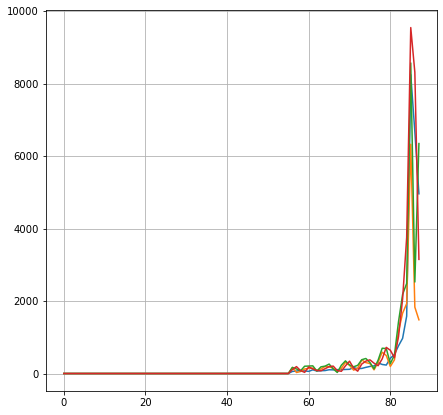

In [10]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
measurement_path_str = 'dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat'
measurement_path = pathlib.Path('dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][0]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = False

row_num, col_num = 1,1
fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    if(ax_num > 0):
        break
    average = []
    ax_num = 0
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.concatenate((np.zeros(measurement['Kmaxm1']), np.abs(measurement['RxyT'])))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)
        
    if avg:
        average = list(map(lambda x: x/7, average))
        plt.plot(average, label="Average", linewidth=4, markersize=7, color='black')
        plt.legend()
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])

        peak = np.argmax(average)
        peaks.append(peak)
        plt.axhline(y=average[peak], linestyle = '--', color='black')
        plt.axvline(peak, linestyle = '--', color='black')
        plt.plot(peak, average[peak], marker='o', markersize=15, color='black')
        plt
        plt.annotate("{} ns".format(peak), (peak, average[peak]),
                    xytext=(-50,10), textcoords='offset points',
                    family='sans-serif', fontsize=16, color='black')
    
warnings.resetwarnings()


c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


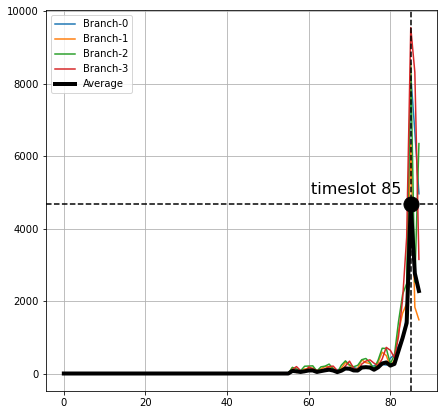

In [11]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
measurement_path_str = 'dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat'
measurement_path = pathlib.Path('dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][0]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = True

row_num, col_num = 1,1
fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    if(ax_num > 0):
        break
    average = []
    ax_num = 0
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.concatenate((np.zeros(measurement['Kmaxm1']), np.abs(measurement['RxyT'])))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)
        
    if avg:
        average = list(map(lambda x: x/7, average))
        plt.plot(average, label="Average", linewidth=4, markersize=7, color='black')
        plt.legend()
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])

        peak = np.argmax(average)
        peaks.append(peak)
        plt.axhline(y=average[peak], linestyle = '--', color='black')
        plt.axvline(peak, linestyle = '--', color='black')
        plt.plot(peak, average[peak], marker='o', markersize=15, color='black')
        plt
        plt.annotate("timeslot {}".format(peak), (peak, average[peak]),
                    xytext=(-100,10), textcoords='offset points',
                    family='sans-serif', fontsize=16, color='black')
    
warnings.resetwarnings()

c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


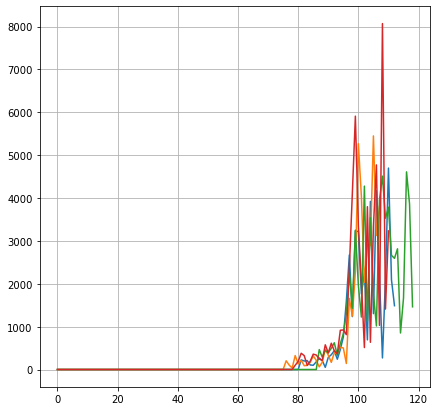

In [12]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
measurement_path_str = 'dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat'
measurement_path = pathlib.Path('dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][0]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = False

fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    if(ax_num > 0):
        break
    average = []
    ax_num = 5
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.concatenate((np.zeros(measurement['Kmaxm1']), np.abs(measurement['RxyT'])))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)
        
    if avg:
        average = list(map(lambda x: x/7, average))
        plt.plot(average, label="Average", linewidth=4, markersize=7, color='black')
        plt.legend()
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])

        peak = np.argmax(average)
        peaks.append(peak)
        plt.axhline(y=average[peak], linestyle = '--', color='black')
        plt.axvline(peak, linestyle = '--', color='black')
        plt.plot(peak, average[peak], marker='o', markersize=15, color='black')
        plt
        plt.annotate("{} ns".format(peak), (peak, average[peak]),
                    xytext=(-50,10), textcoords='offset points',
                    family='sans-serif', fontsize=16, color='black')
    
warnings.resetwarnings()

c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


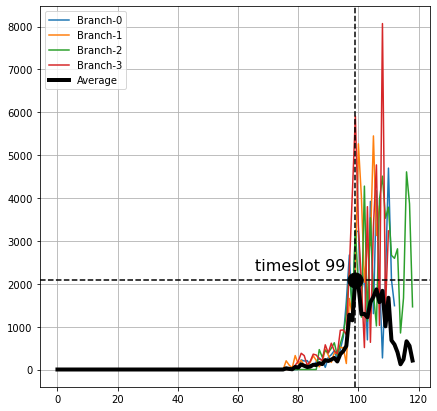

In [13]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
measurement_path_str = 'dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat'
measurement_path = pathlib.Path('dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][0]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = True

fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    if(ax_num > 0):
        break
    average = []
    ax_num = 5
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.concatenate((np.zeros(measurement['Kmaxm1']), np.abs(measurement['RxyT'])))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)
        
    if avg:
        average = list(map(lambda x: x/7, average))
        plt.plot(average, label="Average", linewidth=4, markersize=7, color='black')
        plt.legend()
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])

        peak = np.argmax(average)
        peaks.append(peak)
        plt.axhline(y=average[peak], linestyle = '--', color='black')
        plt.axvline(peak, linestyle = '--', color='black')
        plt.plot(peak, average[peak], marker='o', markersize=15, color='black')
        plt
        plt.annotate("timeslot {}".format(peak), (peak, average[peak]),
                    xytext=(-100,10), textcoords='offset points',
                    family='sans-serif', fontsize=16, color='black')
    
warnings.resetwarnings()

c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


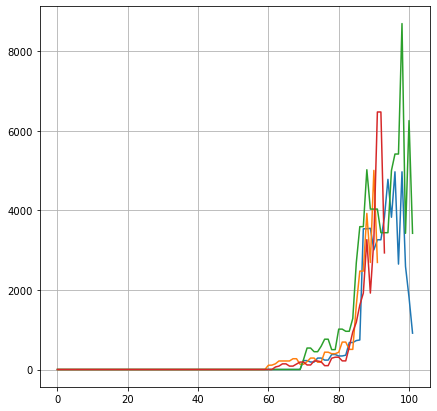

In [14]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
measurement_path_str = 'dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat'
measurement_path = pathlib.Path('dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][0]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = False

row_num, col_num = 1,1
fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    if(ax_num > 0):
        break
    average = []
    ax_num = 6
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.concatenate((np.zeros(measurement['Kmaxm1']), signal.medfilt(np.abs(measurement['RxyT']))))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)
        
    if avg:
        average = list(map(lambda x: x/7, average))
        plt.plot(average, label="Average", linewidth=4, markersize=7, color='black')
        plt.legend()

        peak = np.argmax(average)
        peaks.append(peak)
        plt.axhline(y=average[peak], linestyle = '--', color='black')
        plt.axvline(peak, linestyle = '--', color='black')
        plt.plot(peak, average[peak], marker='o', markersize=15, color='black')
        plt
        plt.annotate("{} timeslot".format(peak), (peak, average[peak]),
                    xytext=(-50,10), textcoords='offset points',
                    family='sans-serif', fontsize=16, color='black')
    
warnings.resetwarnings()

c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Dropped 10 points in measurement 72
Distance between the estimated and real position is 1.16 meters
Statistics of measurement 72:
29 out of 90 estimations is within 1m (32.22 %)
90 out of 90 estimations is within 2m (100.0 %)
90 out of 90 estimations is within 5m (100.0 %)
90 out of 90 estimations is within 10m (100.0 %)


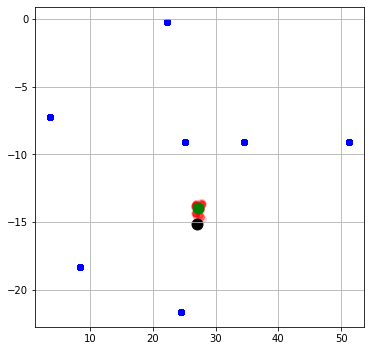

In [21]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
results = np.zeros((6, 9)).tolist()

coords = []

for k, coord in data.active_dot_coordinates.iterrows():
    coords.append((coord['x'], coord['y'], coord['z']))


warnings.filterwarnings("ignore", category=UserWarning)
idx=1

plt.subplots(1,1, figsize=(20,20))
for i in range(72, 81, 1):
    if i > 72:
        break
    plt.subplot(3,3,i-71)
    testdata = dataset.Data(i, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
    ue_pos = testdata.configuration['x'], testdata.configuration['y']
    loc = testdata.tdoa_localization(8)
    plt.grid(True)
    plt.title = "Measurement {}".format(i)
    plt.scatter(testdata.configuration['x'], testdata.configuration['y'], c='black', s=120)
    plt.scatter(tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1], c='green', s=120)
    estimated_distance = distance.euclidean((testdata.configuration['x'], testdata.configuration['y']), (tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1]))
    print(f"Distance between the estimated and real position is {estimated_distance:.2f} meters")
    range1 = 0
    range2 = 0
    range5 = 0
    range10 = 0
    range_else = 0
    for l in loc:
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 1:
            range1+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 2:
            range2+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 5:
            range5+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 10:
            range10+=1
        else:
            range_else+=1
    results[idx][i-72] = estimated_distance
    print('Statistics of measurement {}:'.format(i))
    print(str(range1) + ' out of ' + str(len(loc)) + ' estimations is within 1m (' + str(round(range1/len(loc)*100, 2))+ ' %)')
    print(str(range2) + ' out of ' + str(len(loc)) + ' estimations is within 2m (' + str(round(range2/len(loc)*100, 2))+ ' %)')
    print(str(range5) + ' out of ' + str(len(loc)) + ' estimations is within 5m (' + str(round(range5/len(loc)*100, 2))+ ' %)')
    print(str(range10) + ' out of ' + str(len(loc)) + ' estimations is within 10m (' + str(round(range10/len(loc)*100, 2))+ ' %)')

warnings.resetwarnings()

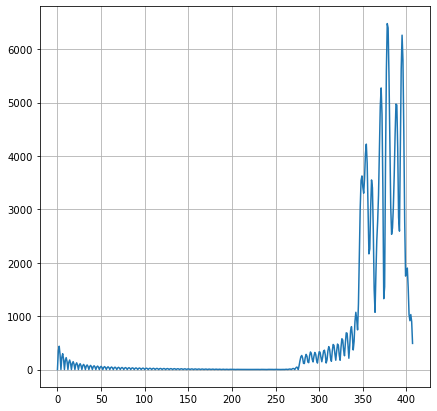

In [16]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
measurement_path_str = 'dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat'
measurement_path = pathlib.Path('dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][0]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = False

row_num, col_num = 1,1
fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    if(ax_num > 0):
        break
    average = []
    ax_num = 6
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.abs(dataset.upsample_signal(np.concatenate((np.zeros(measurement['Kmaxm1']), (measurement['RxyT']))), upsample_ratio=4))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)
        break

    
warnings.resetwarnings()

c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


102


c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


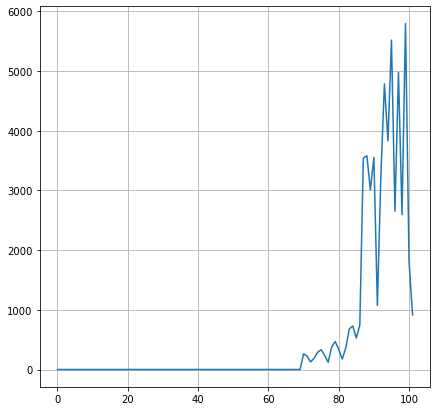

In [17]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
measurement_path_str = 'dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat'
measurement_path = pathlib.Path('dataset/raw/T20230222_1345_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][0]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = False

row_num, col_num = 1,1
fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    if(ax_num > 0):
        break
    average = []
    ax_num = 6
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.abs(np.concatenate((np.zeros(measurement['Kmaxm1']), (measurement['RxyT']))))
        print(len(record))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)
        break

    
warnings.resetwarnings()

Dropped 10 points in measurement 72
Distance between the estimated and real position is 1.16 meters
Statistics of measurement 72:
29 out of 90 estimations is within 1m (32.22 %)
90 out of 90 estimations is within 2m (100.0 %)
90 out of 90 estimations is within 5m (100.0 %)
90 out of 90 estimations is within 10m (100.0 %)


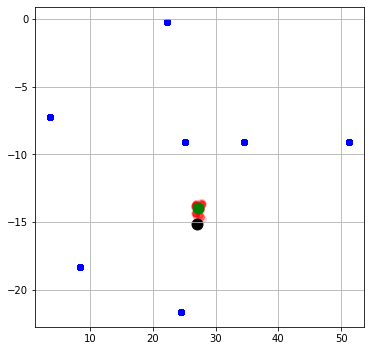

In [8]:
warnings.filterwarnings("ignore", category=UserWarning)
import pyfiles.dataset as dataset

plt.subplots(1,1, figsize=(20,20))
for i in range(72, 81, 1):
    i = 72
    plt.subplot(3,3,i-71)
    testdata = dataset.Data(i, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
    ue_pos = testdata.configuration['x'], testdata.configuration['y']
    loc = testdata.tdoa_localization(8)
    
    plt.grid(True)
    plt.title = "Measurement {}".format(i)
    plt.scatter(testdata.configuration['x'], testdata.configuration['y'], c='black', s=120)
    plt.scatter(tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1], c='green', s=120)
    estimated_distance = distance.euclidean((testdata.configuration['x'], testdata.configuration['y']), (tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1]))
    print(f"Distance between the estimated and real position is {estimated_distance:.2f} meters")
    range1 = 0
    range2 = 0
    range5 = 0
    range10 = 0
    range_else = 0
    for l in loc:
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 1:
            range1+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 2:
            range2+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 5:
            range5+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 10:
            range10+=1
        else:
            range_else+=1
    print('Statistics of measurement {}:'.format(i))
    print(str(range1) + ' out of ' + str(len(loc)) + ' estimations is within 1m (' + str(round(range1/len(loc)*100, 2))+ ' %)')
    print(str(range2) + ' out of ' + str(len(loc)) + ' estimations is within 2m (' + str(round(range2/len(loc)*100, 2))+ ' %)')
    print(str(range5) + ' out of ' + str(len(loc)) + ' estimations is within 5m (' + str(round(range5/len(loc)*100, 2))+ ' %)')
    print(str(range10) + ' out of ' + str(len(loc)) + ' estimations is within 10m (' + str(round(range10/len(loc)*100, 2))+ ' %)')
    break

warnings.resetwarnings()

Dropped 3 points in measurement 76
Distance between the estimated and real position is 0.52 meters
Statistics of measurement 76:
97 out of 97 estimations is within 1m (100.0 %)
97 out of 97 estimations is within 2m (100.0 %)
97 out of 97 estimations is within 5m (100.0 %)
97 out of 97 estimations is within 10m (100.0 %)


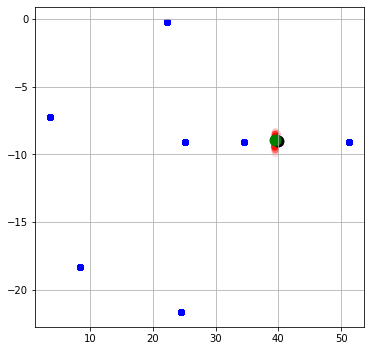

In [9]:
warnings.filterwarnings("ignore", category=UserWarning)
import pyfiles.dataset as dataset

plt.subplots(1,1, figsize=(20,20))
for i in range(72, 81, 1):
    i = 76
    plt.subplot(3,3,i-71)
    testdata = dataset.Data(i, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
    ue_pos = testdata.configuration['x'], testdata.configuration['y']
    loc = testdata.tdoa_localization(8)
    
    plt.grid(True)
    plt.title = "Measurement {}".format(i)
    plt.scatter(testdata.configuration['x'], testdata.configuration['y'], c='black', s=120)
    plt.scatter(tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1], c='green', s=120)
    estimated_distance = distance.euclidean((testdata.configuration['x'], testdata.configuration['y']), (tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1]))
    print(f"Distance between the estimated and real position is {estimated_distance:.2f} meters")
    range1 = 0
    range2 = 0
    range5 = 0
    range10 = 0
    range_else = 0
    for l in loc:
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 1:
            range1+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 2:
            range2+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 5:
            range5+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 10:
            range10+=1
        else:
            range_else+=1
    print('Statistics of measurement {}:'.format(i))
    print(str(range1) + ' out of ' + str(len(loc)) + ' estimations is within 1m (' + str(round(range1/len(loc)*100, 2))+ ' %)')
    print(str(range2) + ' out of ' + str(len(loc)) + ' estimations is within 2m (' + str(round(range2/len(loc)*100, 2))+ ' %)')
    print(str(range5) + ' out of ' + str(len(loc)) + ' estimations is within 5m (' + str(round(range5/len(loc)*100, 2))+ ' %)')
    print(str(range10) + ' out of ' + str(len(loc)) + ' estimations is within 10m (' + str(round(range10/len(loc)*100, 2))+ ' %)')
    break

warnings.resetwarnings()

Threshold: 95%

Dropped 4 points in measurement 75
Distance between the estimated and real position is 23.68 meters
Statistics of measurement 75:
0 out of 96 estimations is within 1m (0.0 %)
0 out of 96 estimations is within 2m (0.0 %)
0 out of 96 estimations is within 5m (0.0 %)
0 out of 96 estimations is within 10m (0.0 %)


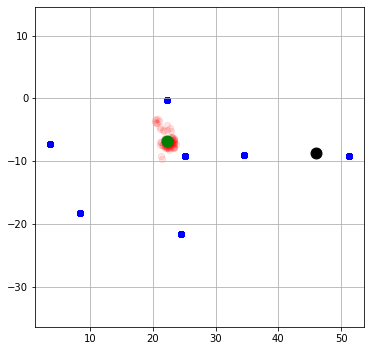

In [7]:
warnings.filterwarnings("ignore", category=UserWarning)
import pyfiles.dataset as dataset

plt.subplots(1,1, figsize=(20,20))
for i in range(72, 81, 1):
    i = 75
    plt.subplot(3,3,i-71)
    testdata = dataset.Data(i, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
    ue_pos = testdata.configuration['x'], testdata.configuration['y']
    loc = testdata.tdoa_localization(8)
    
    plt.grid(True)
    plt.title = "Measurement {}".format(i)
    plt.scatter(testdata.configuration['x'], testdata.configuration['y'], c='black', s=120)
    plt.scatter(tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1], c='green', s=120)
    plt.axis('equal')
    estimated_distance = distance.euclidean((testdata.configuration['x'], testdata.configuration['y']), (tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1]))
    print(f"Distance between the estimated and real position is {estimated_distance:.2f} meters")
    range1 = 0
    range2 = 0
    range5 = 0
    range10 = 0
    range_else = 0
    for l in loc:
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 1:
            range1+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 2:
            range2+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 5:
            range5+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 10:
            range10+=1
        else:
            range_else+=1
    print('Statistics of measurement {}:'.format(i))
    print(str(range1) + ' out of ' + str(len(loc)) + ' estimations is within 1m (' + str(round(range1/len(loc)*100, 2))+ ' %)')
    print(str(range2) + ' out of ' + str(len(loc)) + ' estimations is within 2m (' + str(round(range2/len(loc)*100, 2))+ ' %)')
    print(str(range5) + ' out of ' + str(len(loc)) + ' estimations is within 5m (' + str(round(range5/len(loc)*100, 2))+ ' %)')
    print(str(range10) + ' out of ' + str(len(loc)) + ' estimations is within 10m (' + str(round(range10/len(loc)*100, 2))+ ' %)')
    break

warnings.resetwarnings()

Threshold: 15%

Dropped 22 points in measurement 75
Distance between the estimated and real position is 10.19 meters
Statistics of measurement 75:
0 out of 78 estimations is within 1m (0.0 %)
3 out of 78 estimations is within 2m (3.85 %)
20 out of 78 estimations is within 5m (25.64 %)
32 out of 78 estimations is within 10m (41.03 %)


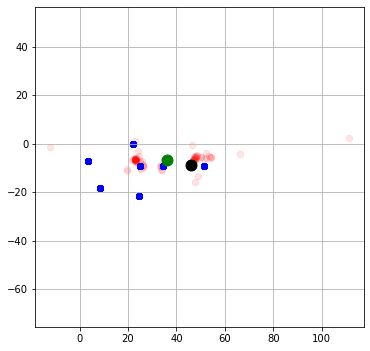

In [83]:
warnings.filterwarnings("ignore", category=UserWarning)
import pyfiles.dataset as dataset

plt.subplots(1,1, figsize=(20,20))
for i in range(72, 81, 1):
    i = 75
    plt.subplot(3,3,i-71)
    testdata = dataset.Data(i, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
    ue_pos = testdata.configuration['x'], testdata.configuration['y']
    loc = testdata.tdoa_localization(8)
    
    plt.grid(True)
    plt.title = "Measurement {}".format(i)
    plt.scatter(testdata.configuration['x'], testdata.configuration['y'], c='black', s=120)
    plt.scatter(tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1], c='green', s=120)
    plt.axis('equal')
    estimated_distance = distance.euclidean((testdata.configuration['x'], testdata.configuration['y']), (tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1]))
    print(f"Distance between the estimated and real position is {estimated_distance:.2f} meters")
    range1 = 0
    range2 = 0
    range5 = 0
    range10 = 0
    range_else = 0
    for l in loc:
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 1:
            range1+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 2:
            range2+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 5:
            range5+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 10:
            range10+=1
        else:
            range_else+=1
    print('Statistics of measurement {}:'.format(i))
    print(str(range1) + ' out of ' + str(len(loc)) + ' estimations is within 1m (' + str(round(range1/len(loc)*100, 2))+ ' %)')
    print(str(range2) + ' out of ' + str(len(loc)) + ' estimations is within 2m (' + str(round(range2/len(loc)*100, 2))+ ' %)')
    print(str(range5) + ' out of ' + str(len(loc)) + ' estimations is within 5m (' + str(round(range5/len(loc)*100, 2))+ ' %)')
    print(str(range10) + ' out of ' + str(len(loc)) + ' estimations is within 10m (' + str(round(range10/len(loc)*100, 2))+ ' %)')
    break

warnings.resetwarnings()

c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


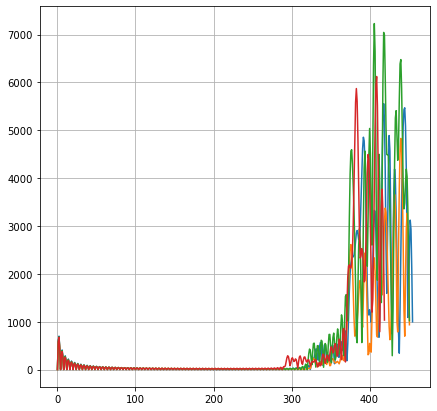

In [69]:

data = dataset.Data(76, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
recievers = pd.read_csv(pathlib.Path('dataset/configurations/DOT_COORDINATES_Ottawa.csv'), index_col='id_short')
measurement_path_str = str(testdata.measurement_path)
measurement_path = pathlib.Path(measurement_path_str)

measurement_data = scipy.io.loadmat(measurement_path)

data = pd.DataFrame(measurement_data['UDP_data'][65]).applymap(
                                    lambda x: x[0][0] if len(x[0]) == 1 else x[0])[[
                                        'dpePortSel', 'dpeBrSel', 'RxyT', 'Kmaxm1'
                                    ]].drop_duplicates(subset=['dpePortSel', 'dpeBrSel'], keep='first')


active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]

warnings.filterwarnings("ignore")
avg = False

row_num, col_num = 1,1
fig, ax = plt.subplots(figsize=fig_size, nrows=row_num, ncols=col_num)
peaks = []
for ax_num in range(row_num*col_num):
    average = []
    for _, measurement in data.query("dpePortSel == @ax_num").iterrows():
        record = np.abs(dataset.upsample_signal(np.concatenate((np.zeros(measurement['Kmaxm1']), (measurement['RxyT']))), upsample_ratio=4))
        plt.plot(record, label=f"Branch-{measurement['dpeBrSel']}", )
        plt.xlabel = 'Time index in timeslot'
        plt.ylabel = 'Received Signal Strength'
        plt.grid(True)
        plt.title = "DOT{} [{}]".format(ax_num, active_dots[ax_num])
        if len(average) < len(record):
            average = np.concatenate((average, np.zeros(len(record) - len(average))))
        elif len(average) > len(record):
            record = np.concatenate((record, np.zeros(len(average) - len(record))))
        average = np.add(average, record)

    
warnings.resetwarnings()

Visualization of First peak above treshold method

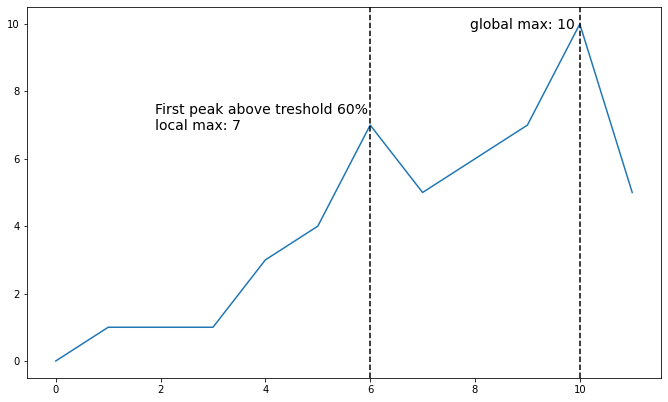

In [64]:
warnings.filterwarnings("ignore")

plt.subplots(1,1, figsize=(25,15))
plt.subplot(2,2,1)
record1 = [0,1,1,1,3,4,7,5,6,7,10,5]
plt.plot(record1)
peak_local_rec1 = dataset.find_first_peak_above_threshold(record1, 0.6)
plt.axvline(x=peak_local_rec1, linestyle = '--', color='black')
plt.annotate("First peak above treshold 60%\nlocal max: {}".format(record1[peak_local_rec1]), (peak_local_rec1, record1[peak_local_rec1]),
            xytext=(-215,-5), textcoords='offset points',
            family='sans-serif', fontsize=14, color='black')
plt.axvline(x=np.argmax(record1), linestyle = '--', color='black')
plt.annotate("global max: {}".format(record1[np.argmax(record1)]), (np.argmax(record1), record1[np.argmax(record1)]),
            xytext=(-110,-5), textcoords='offset points',
            family='sans-serif', fontsize=14, color='black')

warnings.resetwarnings()